In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd

data = tfds.load('horses_or_humans', split='train', as_supervised=True)

train_batches = data.shuffle(100).batch(10)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam', loss='binary_crossentropy',
metrics=['accuracy'])

epochs_hist = model.fit(train_batches, epochs=10)


AttributeError: 'list' object has no attribute 'take'

## Gráficos de análise de comparação de perda e precisão

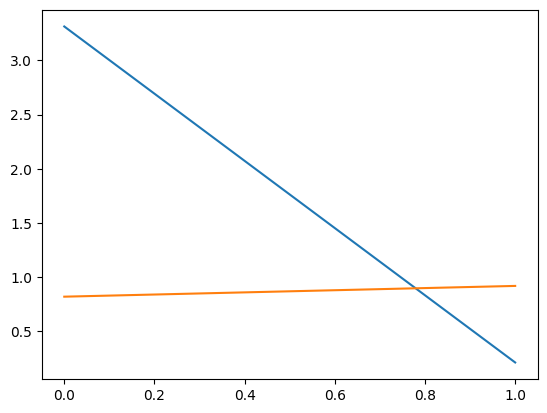

In [10]:
history_df = pd.DataFrame(epochs_hist.history)
history_df['loss'].plot();
history_df['accuracy'].plot();